In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as se

In [2]:
raw_data = pd.read_csv('banglore_data.csv')

In [3]:
raw_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
raw_data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


## Exploratory data analysis

In [6]:
df = raw_data.copy()

In [7]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


E:\ajeet_data\conda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
E:\ajeet_data\conda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


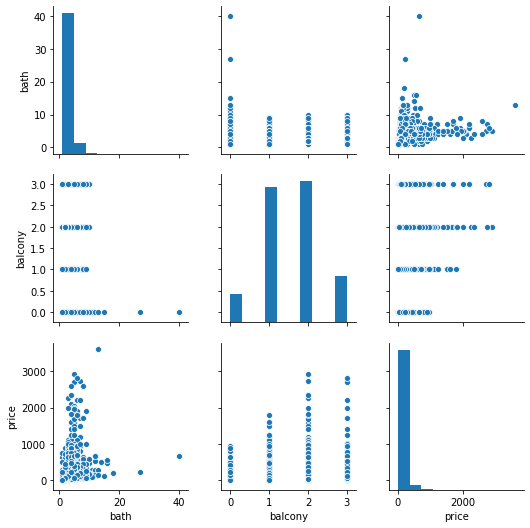

In [8]:
se.pairplot(df)

In [9]:
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print("______________________________________")

In [10]:
value_count(df)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
______________________________________
Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
19-Jan                     39
18-Oct                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
19-Sep                     21
17-Oct                     21
22-Jun                     19
19-Aug                     18
21-Jun                     17
Immed

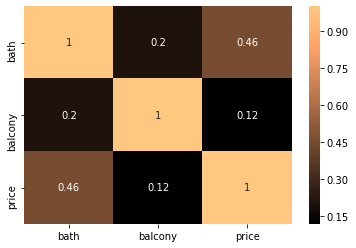

In [11]:
#correlartion heatmap of numerical variables
num_vars = ["bath", "balcony", "price"]
se.heatmap(df[num_vars].corr(), cmap= "copper", annot=True)

In [12]:
#AS  shown in the heatmap correlation of bath is greater than balcony

# preparing data : 
## clean the data for the prediction model

In [13]:
df.isnull().sum() #null value count the dataset

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
# we will see for percentages of the null values
df.isnull().mean() * 100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [15]:
# as we can see that socity has higher number of 41% of null value we need to drop it

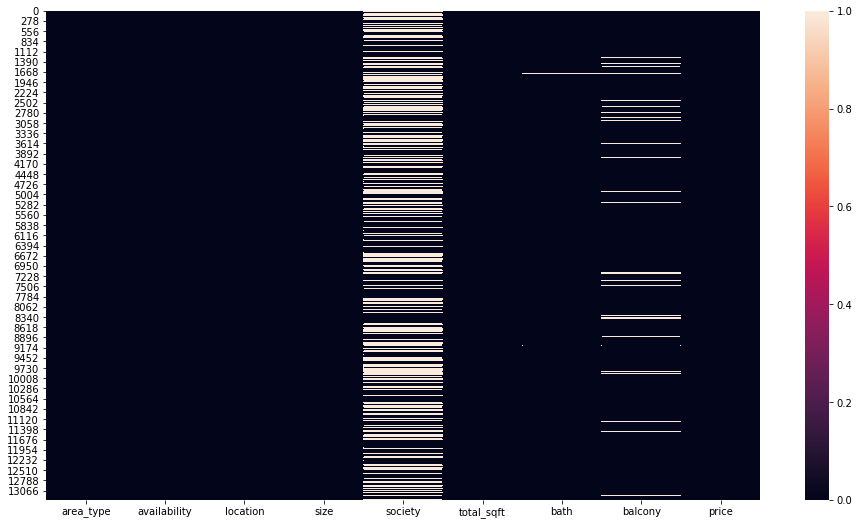

In [16]:
# we can visualise the null values in the dataset to get insight where is the missing values
plt.figure(figsize = (16,9))
se.heatmap(df.isnull())

In [17]:
# By looking at the above figure we can see that, society has huge number of null values so we will drop it

df2 = df.drop('society', axis="columns")

In [18]:
# balcony contains 4.5% of the null values so we can not drop it, instead we can fill the null with mean values
df2['balcony'] = df['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [19]:
df2.shape

(13320, 8)

In [20]:
# for the remaining na values we will drop the na rows beacause the null value  count is ignoreable
df3 = df2.dropna()
df3.shape

(13246, 8)

In [21]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [22]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [23]:
df3.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0


## now we'll do feature engineering

In [24]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)    # To display all the rows and columns

In [25]:
df3['total_sqft'].value_counts()

#after seeing the value coutns we can see that it has various types of value's in string foramt like - range values 100 - 200, float with string, we will convert it in number format by spliting it

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1160                  60
1125                  60
1550                  60
950                   59
1180                  58
1700                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1225                  48
1175                  48


In [26]:
total_sqft_int = []
for str_value in df3["total_sqft"]:
    try:
        total_sqft_int.append(float(str_value))
    except:
        try:
            temp = []
            str_value.split('-')
            total_sqft_int.appned((float(temp[0]) + float(temp[-1])) / 2)
        except:
            total_sqft_int.append(np.nan)

In [27]:
df4 = df3.reset_index(drop = True)   #drop = True will drop the index column

In [28]:
df5 = df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [29]:
df5.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
13241,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0
13242,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0
13243,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0
13244,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0
13245,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0


In [30]:
df5['total_sqft_int'].value_counts()

1200.00     843
1100.00     221
1500.00     204
2400.00     195
600.00      180
1000.00     172
1350.00     132
1050.00     123
1300.00     117
1250.00     114
900.00      112
1400.00     108
1800.00     104
1150.00     101
1600.00     100
1140.00      91
2000.00      82
1450.00      70
1650.00      69
800.00       67
3000.00      66
1075.00      66
1020.00      63
2500.00      62
1125.00      60
1160.00      60
1550.00      60
950.00       59
1180.00      58
1700.00      58
1260.00      57
1255.00      56
1220.00      55
1080.00      55
1070.00      53
750.00       52
700.00       52
1225.00      48
1175.00      48
4000.00      48
1320.00      46
2100.00      46
1240.00      46
1230.00      45
1060.00      45
1210.00      44
850.00       43
1280.00      42
1185.00      41
1270.00      41
1190.00      40
1170.00      40
1410.00      40
1750.00      39
1025.00      38
1330.00      38
1850.00      37
1290.00      37
1310.00      37
1065.00      36
1194.00      36
1090.00      35
1215.00 

In [31]:
df5.isnull().sum()

area_type           0
availability        0
location            0
size                0
total_sqft          0
bath                0
balcony             0
price               0
total_sqft_int    190
dtype: int64

In [32]:
df5['total_sqft_int'] = df5['total_sqft_int'].fillna(df5['total_sqft_int'].mean())

In [33]:
df5.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
total_sqft_int    0
dtype: int64

In [34]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13246 entries, 0 to 13245
Data columns (total 9 columns):
area_type         13246 non-null object
availability      13246 non-null object
location          13246 non-null object
size              13246 non-null object
total_sqft        13246 non-null object
bath              13246 non-null float64
balcony           13246 non-null float64
price             13246 non-null float64
total_sqft_int    13246 non-null float64
dtypes: float64(4), object(5)
memory usage: 931.4+ KB


(13246, 9)

## Working on "size" feature

In [35]:
df5['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
14 BHK           1
Name: size, dtype: int64

In [36]:
# we will only take the number for the room size and we will remove the suffix
room_size_int  =[]
for val in df5['size']:
    temp = []
    temp = val.split(" ")
    try:
        room_size_int.append(int(temp[0]))
    except:
        room_size_int.append(np.nan)
        print('noise',val)

In [37]:
df5 = df5.reset_index(drop = True)

In [38]:
df6 = df5.join(pd.DataFrame({'bhk_size':room_size_int}))
df6.shape

(13246, 10)

In [39]:
df6.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk_size
13241,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13242,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13243,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13244,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13245,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


## finding outlier and removing it

In [40]:
# function to creat histogram, Q - Q plot and boxplot
import scipy.stats as stats

def plots(df, variable):
    #defining figure size
    plt.figure(figsize = (16,4))
    
    #histogram
    plt.subplot(1, 3, 1)
    se.distplot(df[variable], bins=30)
    plt.title('Histogram')
    
    #Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.ylabel('Variable Quantiles')
    
    #Box plot
    plt.subplot(1, 3, 3)
    se.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

**********bath**********


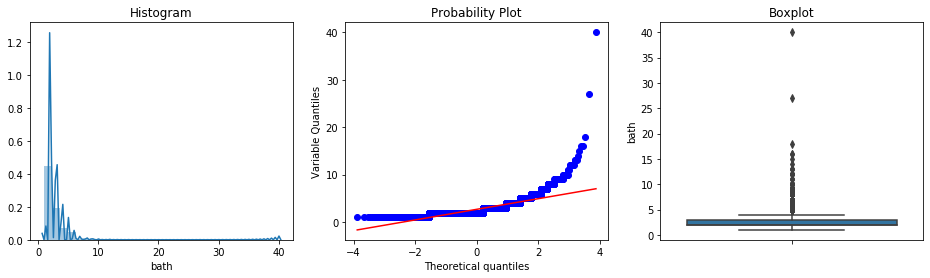

**********balcony**********


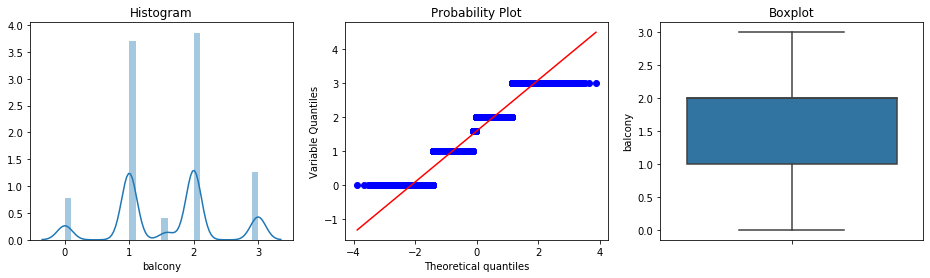

**********total_sqft_int**********


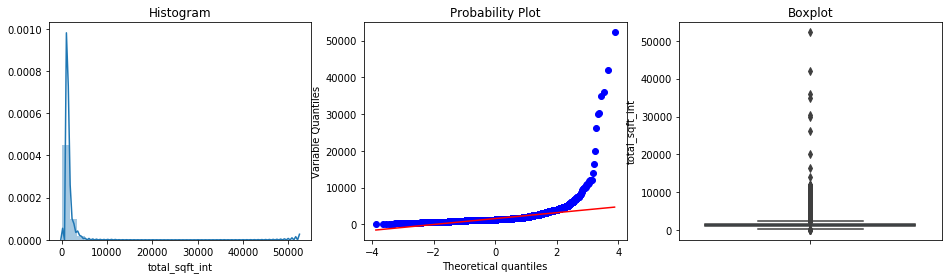

**********bhk_size**********


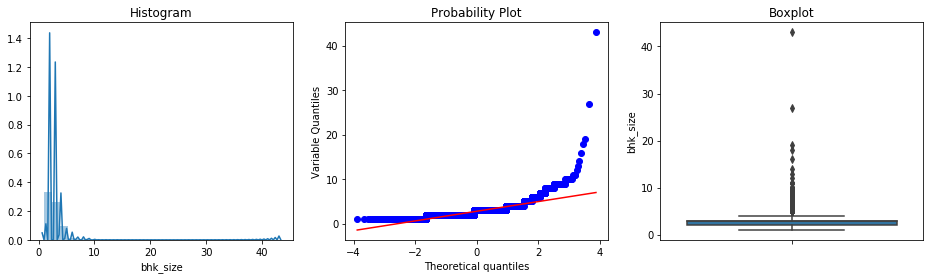

**********price**********


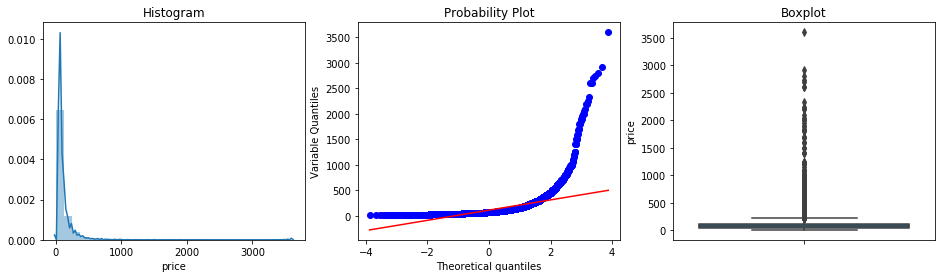

In [41]:
num_var = ['bath', 'balcony', 'total_sqft_int', 'bhk_size', 'price']

for var in num_var:
    print("**********{}**********".format(var))
    plots(df6, var)

In [42]:
# to find the outlie we consider that 1BHK require minimum 350

df6[df6["total_sqft_int"]/df6["bhk_size"] < 370].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk_size
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
31,Super built-up Area,Ready To Move,Bisuvanahalli,3 BHK,1075,2.0,1.000000,35.0,1075.0,3
35,Super built-up Area,21-Dec,Kanakpura Road,2 BHK,700,2.0,1.000000,36.0,700.0,2


In [43]:
df7 = df6[~(df6["total_sqft_int"]/df6["bhk_size"] < 370)]
df7.shape

(11961, 10)

In [44]:
# new feature price_per_sqft 
# it will help finding the outliers

df7["price_per_sqft"] = df7["price"] * 100000 / df7["total_sqft_int"]

df7.head()

E:\ajeet_data\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk_size,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [45]:
df7["price_per_sqft"].describe()

count     11961.000000
mean       6202.286358
std        4074.282808
min         267.829813
25%        4191.666667
50%        5271.317829
75%        6827.794562
max      176470.588235
Name: price_per_sqft, dtype: float64

In [46]:
# as we can see that there is a huge difference in mean and max price, clearly a outlier


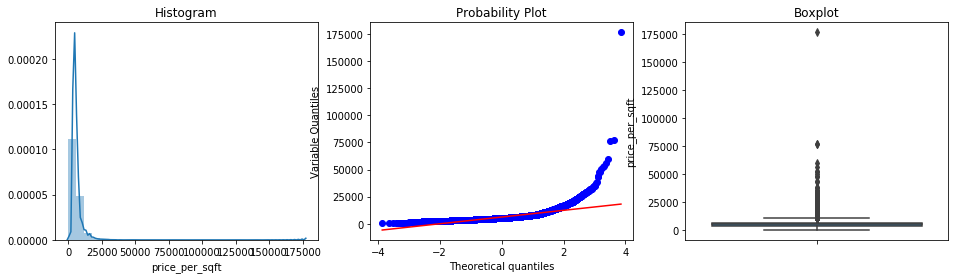

In [47]:
plots(df7, "price_per_sqft")

In [48]:
# Removing outliers
def remove_price_per_sqrft_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft> (m-st)) & ((subdf.price_per_sqft) < (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df8 = remove_price_per_sqrft_outlier(df7)

In [49]:
df8.shape

(8684, 11)

In [50]:
df7.shape

(11961, 11)

In [66]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk_size == 2)]
    bhk3 = df[(df.location == location) & (df.bhk_size == 3)]
    
    plt.figure(figsize=(16,9))
    plt.scatter(bhk2.total_sqft_int, bhk2.price, color ='Blue', label= '2 BHK', s=50)
    plt.scatter(bhk3.total_sqft_int, bhk3.price, color ='Red', label= '3 BHK', s=50, marker = '+')
    plt.xlabel("Total square feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    

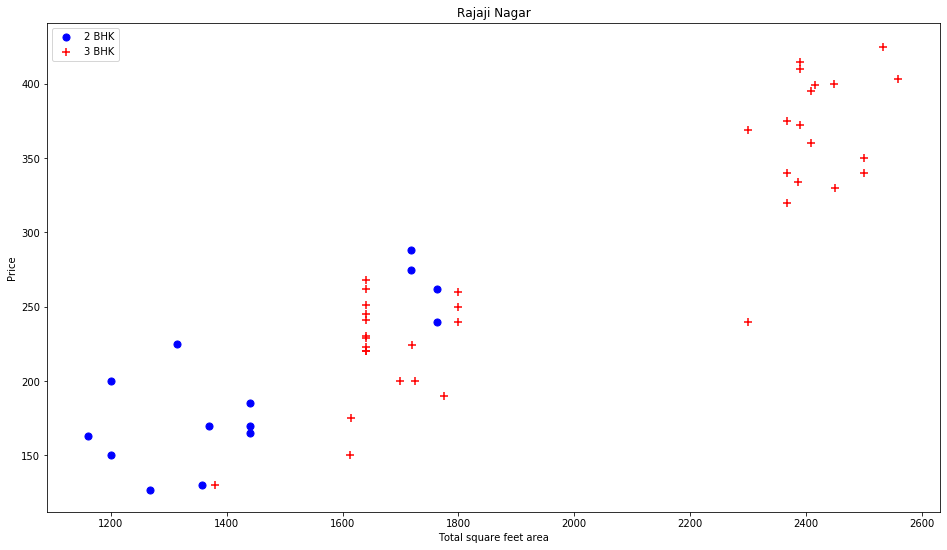

In [67]:
plot_scatter_chart(df8,"Rajaji Nagar")

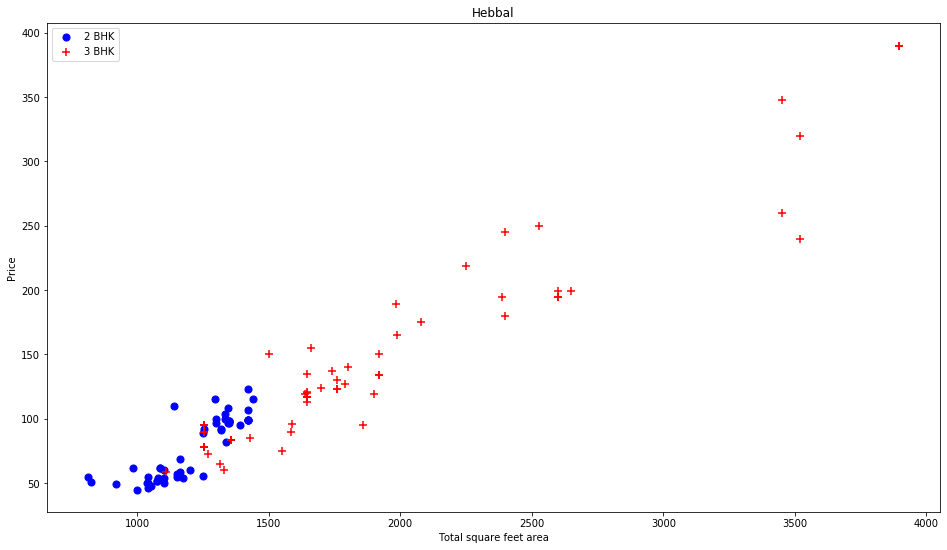

In [61]:
plot_scatter_chart(df8,"Hebbal")

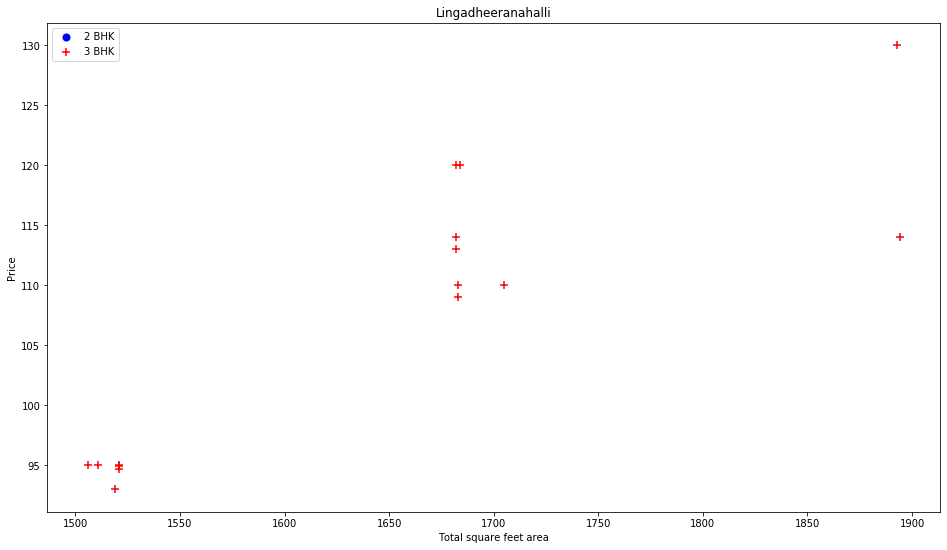

In [68]:
plot_scatter_chart(df8,"Lingadheeranahalli")

In [121]:
# Removing BHK outliers
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk_size'):
            bhk_stats[bhk]={
              'mean':np.mean(bhk_df.price_per_sqft),
              'std':np.std(bhk_df.price_per_sqft),
              'count':bhk_df.shape[0]}
        for bhk, bhk_df in location_df.groupby('bhk_size'):
        
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis='index')
            

In [122]:
df9 = remove_bhk_outliers(df8)
df9.shape

(6976, 11)

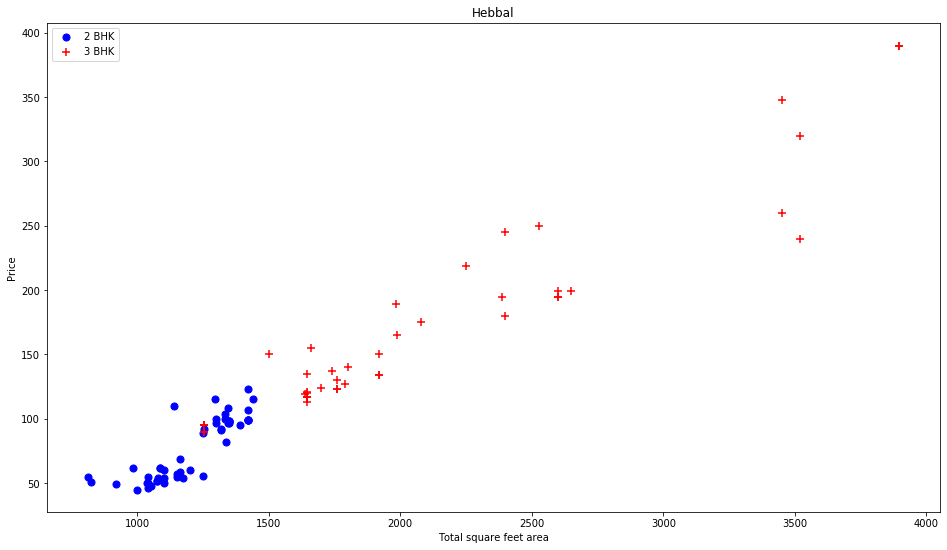

In [115]:
plot_scatter_chart(df9,'Hebbal')
#now we can see that the 3 BHK's in 2BHK's are now gone

## Remove outliers using 'Bath' Feature


In [119]:
# we can cosider that totalo number of bathroom in a flat = BHK + 1
df10 = df9[df9.bath < df9.bhk_size + 2]
df10.shape

(6905, 11)

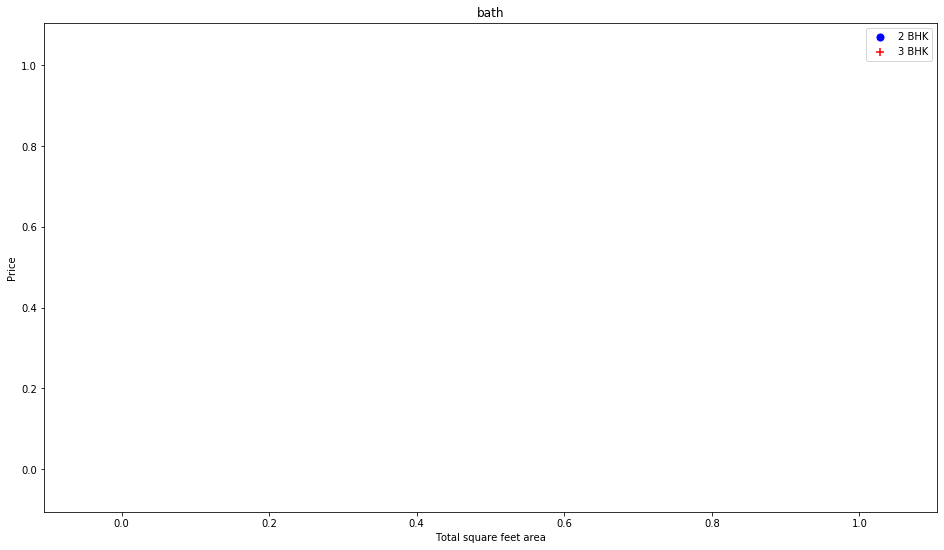

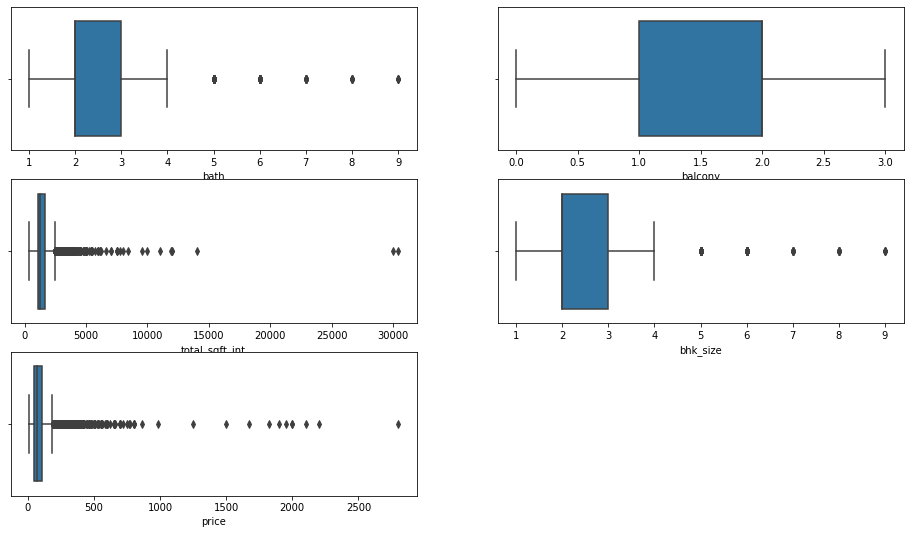

In [124]:
plt.figure(figsize=(16,9))
for i, var in enumerate(num_var):
    plt.subplot(3,2,i+1)
    se.boxplot(df10[var])

In [125]:
df10.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk_size,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,1200.0,2,6916.666667


In [127]:
df11 = df10.drop(['area_type', 'availability','location', 'size', 'total_sqft'], axis = 1)

In [128]:
df11.head()

,bath,balcony,price,total_sqft_int,bhk_size,price_per_sqft
0,3.0,2.0,150.0,1672.0,3,8971.291866
1,3.0,3.0,149.0,1750.0,3,8514.285714
2,3.0,2.0,150.0,1750.0,3,8571.428571
4,2.0,2.0,40.0,1250.0,2,3200.000000
5,2.0,2.0,83.0,1200.0,2,6916.666667


In [130]:
df11.to_csv('cleaned_data.csv', index=False)

## Catagorical variable encoding

In [131]:
df12 = df10.drop(['size', 'total_sqft'], axis = 1)

In [133]:
df12.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk_size,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667


In [134]:
df13 = pd.get_dummies(df12, drop_first = True, columns=['area_type', 'availability', 'location'])

In [135]:
df13.head()

,bath,balcony,price,total_sqft_int,bhk_size,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Jun,availability_15-Nov,availability_15-Oct,availability_16-Dec,availability_16-Jul,availability_16-Mar,availability_16-Nov,availability_16-Oct,availability_16-Sep,availability_17-Apr,availability_17-Aug,availability_17-Dec,availability_17-Jan,availability_17-Jul,availability_17-Jun,availability_17-Mar,availability_17-May,availability_17-Nov,availability_17-Oct,availability_17-Sep,availability_18-Apr,availability_18-Aug,availability_18-Dec,availability_18-Feb,availability_18-Jan,availability_18-Jul,availability_18-Jun,availability_18-Mar,availability_18-May,availability_18-Nov,availability_18-Oct,availability_18-Sep,availability_19-Apr,availability_19-Aug,availability_19-Dec,availability_19-Feb,availability_19-Jan,availability_19-Jul,availability_19-Jun,availability_19-Mar,availability_19-May,availability_19-Oct,availability_19-Sep,availability_20-Apr,availability_20-Aug,availability_20-Dec,availability_20-Jan,availability_20-Jun,availability_20-Mar,availability_20-May,availability_20-Nov,availability_20-Oct,availability_20-Sep,availability_21-Dec,availability_21-Feb,availability_21-Jan,availability_21-Jul,availability_21-Jun,availability_21-Mar,availability_21-May,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Ready To Move,location_ Devarachikkanahalli,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Indira Nagar,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase JP Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Abbaiah Reddy Layout,location_Abbigere,location_Agrahara Dasarahalli,location_Aishwarya Crystal Layout,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshya Nagar,location_Alfa Garden Layout,location_Alur,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anand nagar,location_Anandapura,location_Anantapura,location_Ananth Nagar,location_Anekal,location_Anjanapura,location_Ankappa Layout,location_Annaiah Reddy Layout,location_Ardendale,location_Arehalli,location_Arekere,location_Ashirvad Colony,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Atmananda Colony,location_Attibele,location_Attur Layout,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Narayanapura,location_BCC Layout,location_BEL Road,location_BEML Layout,location_BSM Extension,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM 4th Stage,location_BTM Layout,location_Babusapalaya,location_Badavala Nagar,location_Bagalakunte,location_Bagalur,location_Bagalur Main Road,location_Balagere,location_Balaji Gardens Layout,location_Banagiri Nagar,location_Banashankari,location_Banashankari Stage II,location_Banashankari Stage III,location_Banashankari Stage V,location_Banashankari Stage VI,location_Banaswadi,location_

In [137]:
df13.to_csv('oh_encoded_data1.csv', index = False)

## Working on area type feature

In [139]:
df12['area_type'].value_counts()

Super built-up  Area    5211
Built-up  Area          1261
Plot  Area               402
Carpet  Area              31
Name: area_type, dtype: int64

In [140]:
df14 = df12.copy()

In [144]:
#applying OHE hot encoding
for var in ['Super built-up  Area', 'Built-up  Area', 'Plot  Area']:
    df14['area_type'+var] = np.where(df14['area_type'] == var, 1, 0)

In [145]:
df14.shape

(6905, 12)

In [143]:
df14.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk_size,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1


## Working on availability Feature

In [146]:
df14['availability'].value_counts()

Ready To Move    5475
18-Dec            162
18-Apr            149
18-May            147
18-Aug            123
19-Dec             95
18-Jul             74
18-Mar             71
19-Mar             49
20-Dec             47
18-Jun             47
21-Dec             45
18-Feb             36
19-Jun             24
18-Oct             24
18-Nov             23
18-Sep             22
19-Jan             18
17-Dec             16
20-Jan             16
18-Jan             15
17-Oct             13
21-Mar             13
21-Jun             13
19-Sep             12
19-Aug             12
19-Jul             11
19-Apr             10
17-Jul             10
19-Oct              9
17-Jun              9
22-Dec              7
21-Jan              7
21-Jul              6
17-May              6
21-Feb              5
20-Jun              5
20-Aug              5
17-Sep              5
22-Jan              4
20-Nov              4
17-Apr              4
19-May              4
17-Nov              4
20-Oct              4
20-May    

In [148]:
# since in the availibility 'ready to move' is a higher number 5475 we will code it to 1 and for others we will put 0 in the new 
# Feature we will create availability ready to move

df14['availability_ready_to_move'] = np.where(df14['availability'] == 'Ready To Move', 1, 0)

In [149]:
df14.shape

(6905, 13)

In [150]:
df14.tail()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk_size,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_ready_to_move
8679,Super built-up Area,Ready To Move,Yeshwanthpur Industrial Suburb,6.0,1.584376,390.00,3800.0,6,10263.157895,1,0,0,1
8680,Super built-up Area,18-Nov,manyata park,3.0,1.000000,84.83,1780.0,3,4765.730337,1,0,0,0
8681,Plot Area,Ready To Move,tc.palya,2.0,1.000000,48.00,880.0,2,5454.545455,0,0,1,1
8682,Plot Area,18-Apr,tc.palya,2.0,1.000000,55.00,1000.0,2,5500.000000,0,0,1,0
8683,Plot Area,18-Apr,tc.palya,2.0,1.000000,78.00,1400.0,3,5571.428571,0,0,1,0


## Working on location feature

In [151]:
location_value_count = df14['location'].value_counts()

In [152]:
location_value_count

Whitefield                             210
Sarjapur  Road                         186
Electronic City                        156
Raja Rajeshwari Nagar                  116
Haralur Road                           116
Marathahalli                           115
Bannerghatta Road                      112
Hebbal                                 110
Hennur Road                            109
Uttarahalli                            106
Thanisandra                            100
Electronic City Phase II                89
7th Phase JP Nagar                      85
Yelahanka                               84
Kanakpura Road                          68
KR Puram                                60
Sarjapur                                58
Begur Road                              57
Bellandur                               53
Kasavanhalli                            53
Kothanur                                49
Banashankari                            49
Chandapura                              49
Hormavu    

In [153]:
location_gret_20 = location_value_count[location_value_count > 20].index

In [154]:
location_gret_20

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City',
       'Raja Rajeshwari Nagar', 'Haralur Road', 'Marathahalli',
       'Bannerghatta Road', 'Hebbal', 'Hennur Road', 'Uttarahalli',
       'Thanisandra', 'Electronic City Phase II', '7th Phase JP Nagar',
       'Yelahanka', 'Kanakpura Road', 'KR Puram', 'Sarjapur', 'Begur Road',
       'Bellandur', 'Kasavanhalli', 'Kothanur', 'Banashankari', 'Chandapura',
       'Hormavu', 'Rajaji Nagar', 'Harlur', 'Electronics City Phase 1',
       'Jakkur', 'Akshaya Nagar', 'Varthur', 'HSR Layout', 'Hennur',
       'Kaggadasapura', 'Ramagondanahalli', 'Koramangala', 'Hulimavu',
       'JP Nagar', '8th Phase JP Nagar', 'Hoodi', 'Budigere', 'Kundalahalli',
       'Ramamurthy Nagar', 'Malleshwaram', 'Hegde Nagar', 'Gottigere',
       'Old Madras Road', 'Channasandra', 'Hosa Road', 'Vittasandra',
       'Yeshwanthpur', 'Indira Nagar', 'Brookefield', 'Vijayanagar',
       'Old Airport Road', 'Bommasandra', 'Green Glen Layout', 'Kanakapura',
       

In [161]:
# if location count is greater than 19 then we create column of that feature
# if this location is present in location feature then set value 1 else 0 ( OHE encoding)

df15 = df14.copy()

In [163]:
df15.shape

(6905, 13)

In [164]:
for cat_var in location_gret_20:
    df15['location'+cat_var] = np.where(df15['location'] == cat_var, 1, 0)

    df15.shape

In [165]:
df15.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk_size,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_ready_to_move,locationWhitefield,locationSarjapur Road,locationElectronic City,locationRaja Rajeshwari Nagar,locationHaralur Road,locationMarathahalli,locationBannerghatta Road,locationHebbal,locationHennur Road,locationUttarahalli,locationThanisandra,locationElectronic City Phase II,location7th Phase JP Nagar,locationYelahanka,locationKanakpura Road,locationKR Puram,locationSarjapur,locationBegur Road,locationBellandur,locationKasavanhalli,locationKothanur,locationBanashankari,locationChandapura,locationHormavu,locationRajaji Nagar,locationHarlur,locationElectronics City Phase 1,locationJakkur,locationAkshaya Nagar,locationVarthur,locationHSR Layout,locationHennur,locationKaggadasapura,locationRamagondanahalli,locationKoramangala,locationHulimavu,locationJP Nagar,location8th Phase JP Nagar,locationHoodi,locationBudigere,locationKundalahalli,locationRamamurthy Nagar,locationMalleshwaram,locationHegde Nagar,locationGottigere,locationOld Madras Road,locationChannasandra,locationHosa Road,locationVittasandra,locationYeshwanthpur,locationIndira Nagar,locationBrookefield,locationVijayanagar,locationOld Airport Road,locationBommasandra,locationGreen Glen Layout,locationKanakapura,locationKengeri,locationBalagere,locationSahakara Nagar,locationTalaghattapura,locationKudlu Gate,locationPanathur,locationRachenahalli,locationAmbedkar Nagar,locationThigalarapalya,locationDodda Nekkundi,locationAttibele,locationYelahanka New Town,locationKadugodi,location5th Phase JP Nagar,locationMysore Road,locationNagarbhavi,locationLakshminarayana Pura,locationTC Palaya,locationAnanth Nagar,locationJalahalli,locationKudlu,locationCV Raman Nagar,locationAnekal,locationHosur Road,locationJigani,locationHoramavu Agara,locationSubramanyapura,locationKengeri Satellite Town,locationKalena Agrahara,locationFrazer Town,locationDoddathoguru,locationBhoganhalli,locationBTM 2nd Stage,locationDevanahalli,locationHebbal Kempapura
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [167]:
## drop the catagorical variables that were already encoded
df16 = df15.drop(['area_type', 'availability', 'location'], axis = 1)

In [168]:
df16.head()

,bath,balcony,price,total_sqft_int,bhk_size,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_ready_to_move,locationWhitefield,locationSarjapur Road,locationElectronic City,locationRaja Rajeshwari Nagar,locationHaralur Road,locationMarathahalli,locationBannerghatta Road,locationHebbal,locationHennur Road,locationUttarahalli,locationThanisandra,locationElectronic City Phase II,location7th Phase JP Nagar,locationYelahanka,locationKanakpura Road,locationKR Puram,locationSarjapur,locationBegur Road,locationBellandur,locationKasavanhalli,locationKothanur,locationBanashankari,locationChandapura,locationHormavu,locationRajaji Nagar,locationHarlur,locationElectronics City Phase 1,locationJakkur,locationAkshaya Nagar,locationVarthur,locationHSR Layout,locationHennur,locationKaggadasapura,locationRamagondanahalli,locationKoramangala,locationHulimavu,locationJP Nagar,location8th Phase JP Nagar,locationHoodi,locationBudigere,locationKundalahalli,locationRamamurthy Nagar,locationMalleshwaram,locationHegde Nagar,locationGottigere,locationOld Madras Road,locationChannasandra,locationHosa Road,locationVittasandra,locationYeshwanthpur,locationIndira Nagar,locationBrookefield,locationVijayanagar,locationOld Airport Road,locationBommasandra,locationGreen Glen Layout,locationKanakapura,locationKengeri,locationBalagere,locationSahakara Nagar,locationTalaghattapura,locationKudlu Gate,locationPanathur,locationRachenahalli,locationAmbedkar Nagar,locationThigalarapalya,locationDodda Nekkundi,locationAttibele,locationYelahanka New Town,locationKadugodi,location5th Phase JP Nagar,locationMysore Road,locationNagarbhavi,locationLakshminarayana Pura,locationTC Palaya,locationAnanth Nagar,locationJalahalli,locationKudlu,locationCV Raman Nagar,locationAnekal,locationHosur Road,locationJigani,locationHoramavu Agara,locationSubramanyapura,locationKengeri Satellite Town,locationKalena Agrahara,locationFrazer Town,locationDoddathoguru,locationBhoganhalli,locationBTM 2nd Stage,locationDevanahalli,locationHebbal Kempapura
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [170]:
df16.to_csv('ohe_data_reduced_cat_class1.csv', index = False)